## Importando as bibliotecas Pandas, Matplotlib e NLTK

In [50]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
##import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cs193553\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cs193553\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cs193553\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from unidecode import unidecode
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [55]:
import seaborn as sb
import numpy as np

## Criando Dataframe e importando dados

In [3]:
df = pd.read_csv("C:/Users/cs193553/Desktop/Raisson/Mundo dos Dados/incident.csv", encoding = 'latin1')

In [4]:
dataf = df[:200]

## Função limpeza. 
## Esta função remove chars especiais, transforma em minúscula e remove acentos
## Stop_words = remove palavras insignificantes para o texto.

In [5]:
def clean_function(df, column_text):
    stop_word = stopwords.words('portuguese')
    
    df[f'{column_text}_cleaned'] = df[f'{column_text}']\
    .apply(lambda x: unidecode(x))\
    .replace(regex=r'[^a-zA-Z]+',value=' ')\
    .apply(lambda x: x.lower())\
    .apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)])) 
    
    return df

In [6]:
dataf = clean_function(dataf,'description')

<ipython-input-5-2fdd1249db2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column_text}_cleaned'] = df[f'{column_text}']\


In [7]:
dataf['description_cleaned']

0      totem check in unidade santa candida nao reali...
1      solicito verificacao rede indisponivel sala li...
2      informacoes essenciais access point rz eabar a...
3      cs tr cs telefone telefone alternativo horario...
4      abre pop up solicitando atualizacao instacao d...
                             ...                        
195    informacoes essenciais switch rz eatrm swa pct...
196    informacoes essenciais switch rz eatrm swa amb...
197    informacoes essenciais access point rz eapag a...
198    informacoes essenciais switch rz eatrm swa fat...
199    informacoes essenciais access point rz eapag a...
Name: description_cleaned, Length: 200, dtype: object

In [8]:
dataf['description_cleaned'][3]

'cs tr cs telefone telefone alternativo horario trabalho localidade dois corregos departamento seguranca patrimonial id team viewer dc sadm ocorre outros usuarios sim x nao ocorre outros equipamentos sim x nao maquina pessoal corporativa corporativa ja possui outro chamado sobre assunto sim x nao consultada base conhecimento sim x nao print anexo sim x nao nao justificar aguardando print descricao detalhada dogivaldo contato relatou problemas acesso citrix consta nao possivel acessar site acesso remoto nao possivel equipe poderia verificar atenciosamente equipe service desk'

## Contando a quantidade de ocorrências por categoria


In [9]:
df['u_subcategory'].value_counts()

Wi-Fi                                3126
Desktop                              2645
Acessório Específico                 2033
Aplicação                            1378
Notebook                             1351
                                     ... 
Print Services - Win(in.if.op.ms)       1
Portal de Reembolso                     1
Investigar Incidente                    1
DFSR                                    1
Intranet                                1
Name: u_subcategory, Length: 146, dtype: int64

## Criando uma lista com as 8 categorias de maior ocorrências

In [10]:
categorias = df['u_category'].value_counts()[:8].index.tolist()

## Criando um Dataframe para aplicar o algoritmo de ML somente com as 8 categorias selecionadas


In [11]:
df_ml = df[df['u_category'].isin(categorias)]
df_ml = df_ml[['u_category','description']]

## Removendo as linhas com ocorrências em NaN

In [12]:
df_ml = df_ml.dropna()
df_ml = clean_function(df_ml, 'description')

## Aplicando Label Encoder na coluna CATEGORIAS
## Adicionando coluna com os chars transfarmado em números

In [13]:
categoria_le = LabelEncoder()
t_category = categoria_le.fit_transform(df_ml['u_category'])
df_ml['target'] = t_category

## Separando o Dataframe em base de treino e teste

In [14]:
train, test = train_test_split(df_ml, test_size=0.30, random_state=42)



## Realiza a contagem de frequencia das palavras no vetor
## TF = Frequencia de termos - Pontuação de frequencia da palavra
## IDF = Frequencia inversa de documentos - Pontuação de quão rara a palavra é
## Apicando na base de treino e teste na coluna description

In [15]:
vectorizer = TfidfVectorizer()
train_tf_idf = vectorizer.fit_transform(train['description'])
test_tf_idf = vectorizer.transform(test['description'])

## Criando o objeto do modelo Linear SVC de Machine learning

In [16]:
ml_svc = LinearSVC(random_state=0)

In [17]:
ml_svc.fit(train_tf_idf,train['target'])

LinearSVC(random_state=0)

In [18]:
ml_svc.predict(test_tf_idf)

array([6, 4, 1, ..., 2, 4, 7])

## Criando um  Dataframe com um texto para teste

In [19]:
var_test = 'não inprimi nada corretamente'
df_teste = pd.DataFrame(data = {'text': [var_test]})
df_test_ml = clean_function(df_teste, 'text')
df_test_tf_idf = vectorizer.transform(df_test_ml['text_cleaned'])
categoria_le.inverse_transform(ml_svc.predict(df_test_tf_idf))

array(['Impressora'], dtype=object)

In [20]:
df_teste = pd.DataFrame(data = {'text': [var_test]})
df_test_ml = clean_function(df_teste, 'text')

In [21]:
df_test_ml

,text,text_cleaned
0,não inprimi nada corretamente,nao inprimi nada corretamente


In [22]:
df_test_tf_idf = vectorizer.transform(df_test_ml['text_cleaned'])

In [23]:
categoria_le.inverse_transform(ml_svc.predict(df_test_tf_idf))

array(['Impressora'], dtype=object)

## Atribuindo valores as variáveis True e Pred para métricas

In [36]:
y_true = categoria_le.inverse_transform((test['target']))
y_pred = categoria_le.inverse_transform(ml_svc.predict(test_tf_idf))
name_target = categoria_le.inverse_transform((test['target'].unique()))

## Classification_report

In [37]:
print(classification_report(y_true, y_pred, name_target))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['Telefonia Fixa' 'Rede Local' 'Citrix' 'Computador' 'Acessórios'
 'Impressora' 'Wi-Fi' 'Redes'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


                precision    recall  f1-score   support

Telefonia Fixa       0.95      0.90      0.92       342
    Rede Local       0.98      0.98      0.98      5579
        Citrix       0.91      0.88      0.90       429
    Computador       0.80      0.87      0.84      1249
    Acessórios       0.90      0.88      0.89       998
    Impressora       0.94      0.96      0.95       870
         Wi-Fi       0.87      0.92      0.89       778
         Redes       0.99      0.89      0.94       898

      accuracy                           0.94     11143
     macro avg       0.92      0.91      0.91     11143
  weighted avg       0.94      0.94      0.94     11143



## Matriz de Confusão

In [57]:
matrix_confusion = confusion_matrix(y_true, y_pred, name_target)
matrix_confusion_porcent = matrix_confusion / matrix_confusion.astype(np.float).sum(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['Telefonia Fixa' 'Rede Local' 'Citrix' 'Computador' 'Acessórios'
 'Impressora' 'Wi-Fi' 'Redes'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
<ipython-input-57-0ef36573c981>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix_confusion_porcent = matrix_confusion / matrix_confusion.astype(np.float).sum(axis=1)


<AxesSubplot:>

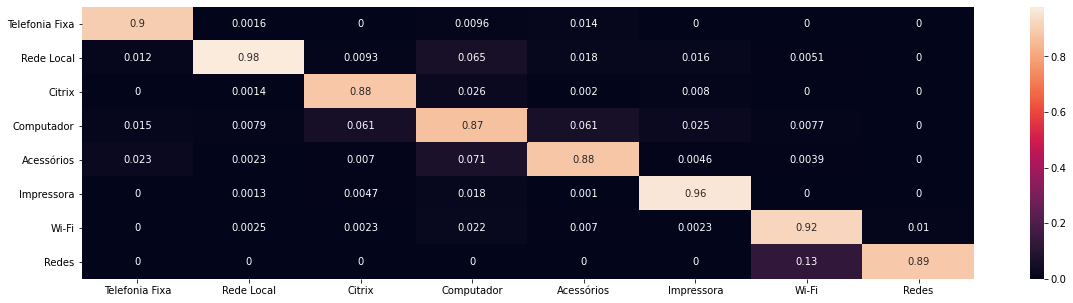

In [59]:
plt.figure(figsize = (20,5))
sb.heatmap(matrix_confusion_porcent, annot=True, xticklabels=name_target, yticklabels=name_target, fmt='.2g')

<ipython-input-56-a7331150bec2>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix_confusion / matrix_confusion.astype(np.float).sum(axis=1)


array([[0.89766082, 0.00161319, 0.        , 0.00960769, 0.01402806,
        0.        , 0.        , 0.        ],
       [0.01169591, 0.97759455, 0.00932401, 0.06485188, 0.01803607,
        0.01609195, 0.00514139, 0.        ],
       [0.        , 0.00143395, 0.88344988, 0.02642114, 0.00200401,
        0.00804598, 0.        , 0.        ],
       [0.01461988, 0.00788672, 0.06060606, 0.86869496, 0.06112224,
        0.02528736, 0.00771208, 0.        ],
       [0.02339181, 0.00233017, 0.00699301, 0.07125701, 0.87975952,
        0.0045977 , 0.00385604, 0.        ],
       [0.        , 0.00125471, 0.004662  , 0.01761409, 0.001002  ,
        0.96321839, 0.        , 0.        ],
       [0.        , 0.00250941, 0.002331  , 0.02161729, 0.00701403,
        0.00229885, 0.92287918, 0.01002227],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.12724936, 0.88975501]])